##### To use a Support Vector Machine (SVM) for anomaly detection, start by loading and cleaning the dataset to ensure data quality. Next, select key features that are indicative of anomalies and split the dataset into training and testing portions. Applying feature scaling to normalize data dimensions is crucial for SVM performance. Train the SVM model with appropriate kernel functions and parameters. Finally, the model will be evaluated using precision, recall, and the F1-score, and its performance will be visualized with a confusion matrix. This structured approach ensures the SVM model effectively identifies anomalies, balancing detection accuracy and model reliability.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import OneClassSVM

C:\Users\sebha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sebha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Precision: 0.847
Recall: 0.782
F1 Score: 0.789
              precision    recall  f1-score   support

           0       0.61      0.95      0.74      3408
           1       0.96      0.70      0.81      7028

    accuracy                           0.78     10436
   macro avg       0.79      0.82      0.78     10436
weighted avg       0.85      0.78      0.79     10436



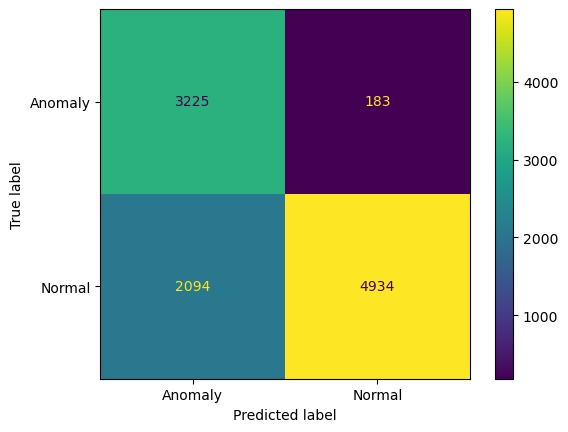

In [4]:

def anomaly_detection_svm():
    # Load the dataset
    
    data = pd.read_csv('US_Util_2020.csv')
    
    #convert all the values in the columns into numeric
    label_encoder = LabelEncoder()
    for column in data.select_dtypes(include=['object']).columns:
        data[column] = label_encoder.fit_transform(data[column])
    
    
    data = data.drop(['zip'], axis=1)
    
#     data.info()
    X = data.drop('res_rate', axis=1)  # Assuming 'target' is the column name of the continuous target variable
    y_cont = data['res_rate']
    
    data = data.dropna(axis=0, inplace=True)

    y = np.where(y_cont > 0.1, 1, 0)  # Define `threshold` based on your domain knowledge
    
    selector = SelectKBest(f_classif, k=4)
    X_selected = selector.fit_transform(X, y)
    
    # Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
     # Initialize One-Class SVM
    # Note: nu should be an estimate of the proportion of outliers
    oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
    # Fit the model on the training data
    # Note: One-Class SVM is typically trained only on the normal data (label 0)
    oc_svm.fit(X_train_scaled[y_train == 0])
    
    # Predict on the test data
    y_pred = oc_svm.predict(X_test_scaled)
    # Convert predictions to match the original label (1 for normal, -1 for anomaly)
    y_pred = np.where(y_pred == 1, 0, 1)
    
    # Evaluate the final outcome
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 Score: {f1:.3f}')
    
    print(classification_report(y_test, y_pred))
    
    
    # Use a confusion matrix for visualization of the outcome
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Anomaly', 'Normal'])
    disp.plot()
    plt.show()


anomaly_detection_svm()